In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
# Load data
# Split train and test
pwat_raw = np.load('PWAT_Train_Snapshots.npy')
pwat_mean = np.mean(pwat_raw,axis=1)
pwat_train = pwat_raw - pwat_mean[:,None]

pwat_raw_test = np.load('PWAT_Test_Snapshots.npy')
pwat_test = pwat_raw_test - pwat_mean[:,None]


z500_raw = np.load('Z500_Train_Snapshots.npy')
z500_mean = np.mean(z500_raw,axis=1)
z500_train = z500_raw - z500_mean[:,None]

z500_raw_test = np.load('Z500_Test_Snapshots.npy')
z500_test = z500_raw_test - z500_mean[:,None]

In [3]:
# Perform method of snapshots POD
def generate_pod_bases(snapshot_matrix,num_modes): #Mean removed
    '''
    Takes input of a snapshot matrix and computes POD bases
    Outputs truncated POD bases and coefficients
    '''
    new_mat = np.matmul(np.transpose(snapshot_matrix),snapshot_matrix)

    w,v = LA.eig(new_mat)
    w[w<0.0] = np.finfo(float).eps

    # Bases
    phi = np.real(np.matmul(snapshot_matrix,v))
    
    phi = phi/np.sqrt(w[None,:])

    coefficient_matrix = np.matmul(np.transpose(phi),snapshot_matrix)

    # Truncate coefficient and phi matrices
    phi_trunc = phi[:,0:num_modes] # Columns are modes
    cf_trunc = coefficient_matrix[0:num_modes,:] #Columns are time, rows are modal coefficients
    
    # Print energy captured      
    print('Percent of energy captured:',np.sum(w[:num_modes])/np.sum(w)*100)

    return phi_trunc, cf_trunc

Percent of energy captured: 91.11045598983765


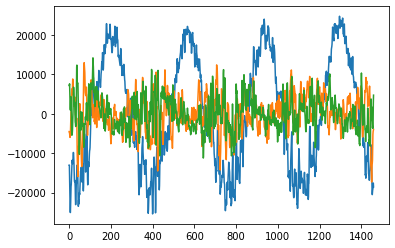

In [4]:
num_modes_z500 = 10
zmodes, zcoeffs = generate_pod_bases(z500_train,num_modes_z500)

plt.figure()
plt.plot(zcoeffs[0,:])
plt.plot(zcoeffs[1,:])
plt.plot(zcoeffs[2,:])
plt.show()

Percent of energy captured: 90.40412902832031


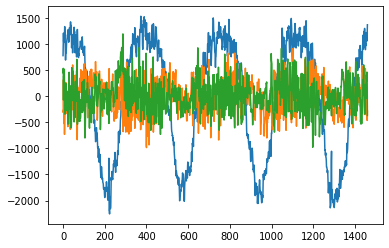

In [5]:
num_modes_pwat = 110
pmodes, pcoeffs = generate_pod_bases(pwat_train,num_modes_pwat)

plt.figure()
plt.plot(pcoeffs[0,:])
plt.plot(pcoeffs[1,:])
plt.plot(pcoeffs[2,:])
plt.show()

In [6]:
np.save('z500_cf.npy',zcoeffs)
np.save('pwat_cf.npy',pcoeffs)

In [12]:
zcoeffs_test = np.matmul(zmodes.T,z500_test)
pcoeffs_test = np.matmul(pmodes.T,pwat_test)

In [13]:
np.save('z500_cf_test.npy',zcoeffs_test)
np.save('pwat_cf_test.npy',pcoeffs_test)